In [3]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.9 MB/s eta 0:00:00 0:00:010:00:01
  Obtaining dependency information for pooch>=1.0 from https://files.pythonhosted.org/packages/1a/a5/5174dac3957ac412e80a00f30b6507031fcab7000afc9ea0ac413bddcff2/pooch-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.org/packages/2b/97/cbce72f9c8b5c9c667eb55dc55be20a87c610dba55c0466c77498c1a8c97/soxr-0.3.7-cp311

In [29]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

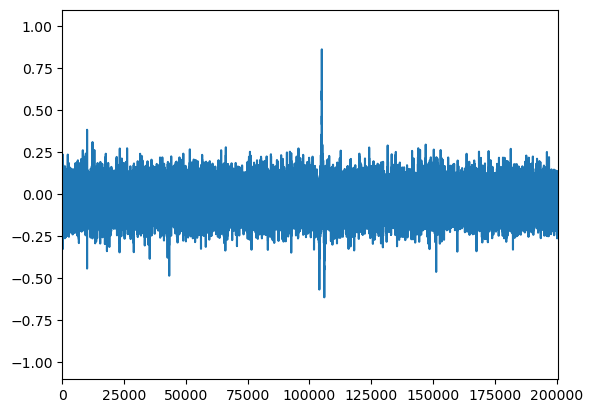

In [37]:
data = pd.read_csv('data.csv')
data.columns = ['Time, seconds', 'Series values, dB']

a = data['Series values, dB'].values

# Rescale data to range [-1, 1]
a_rescaled = 2 * ((a - a.min()) / (a.max() - a.min())) - 1

# Plot data
import matplotlib.pyplot as plt
plt.plot(a_rescaled)
plt.xlim([0, 200704])
plt.show()

# Write audio file
sampling_rate = 40000
write('w3.wav', sampling_rate, a_rescaled.astype(np.float32))

In [41]:
y, sr = librosa.load('w3.wav')

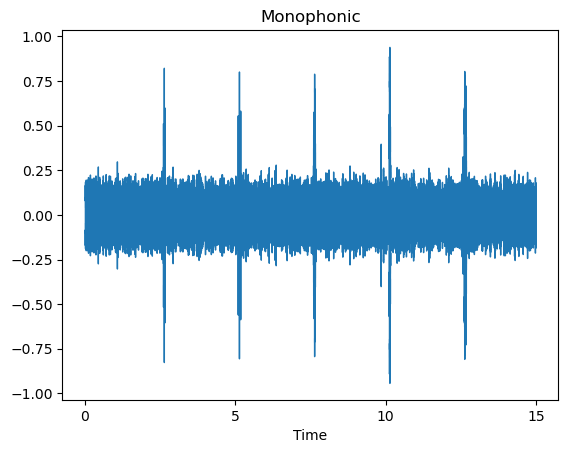

In [45]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
librosa.display.waveshow(y, sr=sr, ax=ax)
ax.set(title='Monophonic')
ax.label_outer()

plt.show()

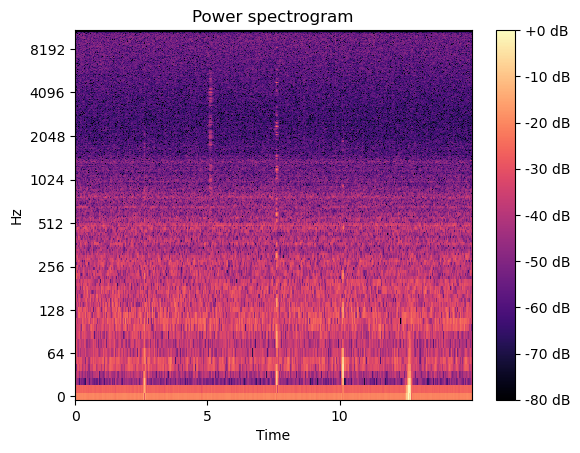

In [47]:
S = np.abs(librosa.stft(y))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

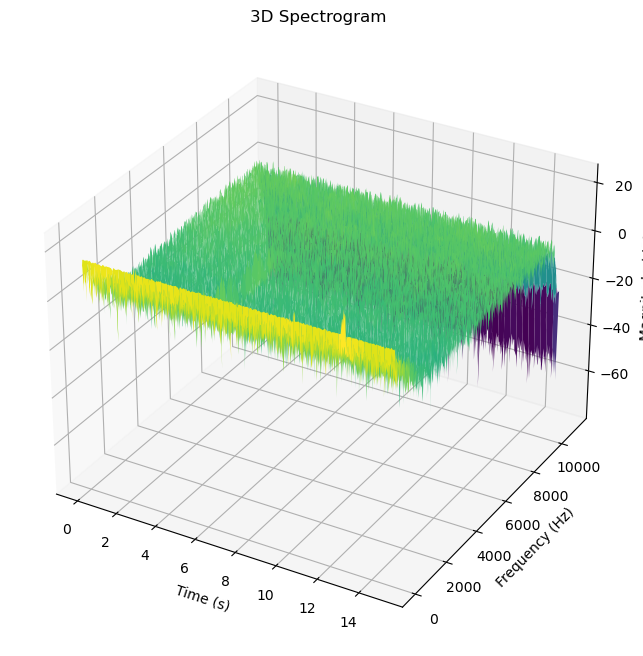

In [50]:
# Вычисление спектрограммы
spectrogram = np.abs(librosa.stft(y))

# Отображение спектрограммы в трехмерном пространстве
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Получение временных и частотных данных
times = librosa.times_like(spectrogram)
freqs = librosa.fft_frequencies(sr=sr)

# Создание сетки для данных спектрограммы
T, F = np.meshgrid(times, freqs)

# Отображение спектрограммы
ax.plot_surface(T, F, 10 * np.log10(spectrogram), cmap='viridis')

# Настройка меток и заголовка
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_zlabel('Magnitude (dB)')
ax.set_title('3D Spectrogram')

plt.show()